In [ ]:
# Import libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import os

pd.set_option('display.max_columns', None)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AHFXAdam/ahfxadam.github.io/master/450-resources/datasets/datasets/office_occupancy/datatraining.txt')
test =  pd.read_csv('https://raw.githubusercontent.com/AHFXAdam/ahfxadam.github.io/master/450-resources/datasets/datasets/office_occupancy/datatest2.txt')

print(str(data.shape) + ' ' + str(test.shape))

(8143, 7) (9752, 7)


In [ ]:
data = pd.concat([data, test.iloc[:1000,:]]).reset_index(drop=True)
test = test.iloc[1001:,:]

print(str(data.shape) + ' ' + str(test.shape))

(9143, 7) (8751, 7)


In [ ]:
data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1
...,...,...,...,...,...,...,...
9138,2015-02-12 07:23:00,20.50,22.8950,0.0,733.00,0.003409,0
9139,2015-02-12 07:24:00,20.50,22.4450,0.0,734.50,0.003341,0
9140,2015-02-12 07:25:00,20.50,22.2900,0.0,733.00,0.003318,0
9141,2015-02-12 07:25:59,20.55,22.2900,0.0,741.00,0.003328,0


In [ ]:
data['Occupancy'].value_counts()

0    7200
1    1943
Name: Occupancy, dtype: int64

Feature Engineering
----------


In [ ]:
def data_process(data):
  
  # format date
  data['date'] = pd.to_datetime(data.date)
  # parse the date (year, month, day)
  # data['month'] = data['date'].str[5:7].astype('int64')
  data['dayOfMonth'] = data['date'].dt.day
  data['hour'] = data['date'].dt.hour
  data['minute'] = data['date'].dt.minute
  data['day_of_week'] = data['date'].dt.day_name()

  # create weekend column
  data['weekend'] = data.day_of_week.apply(
      lambda x: 1 if 'Saturday' in x or 'Sunday' in x else 0
  )

  # final Prep
  encodedData = pd.get_dummies(data, columns=['day_of_week'], drop_first=False)
  return encodedData, data

def dataSplit(data):



  X = data.drop(columns=['Occupancy', 'date'])
  y = data['Occupancy']

  return X, y

In [ ]:
data, data_raw = data_process(data)
X_train, y_train = dataSplit(data)

test, test_raw = data_process(test)
X_test, y_test = dataSplit(test)

In [ ]:
data_raw

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,dayOfMonth,hour,minute,day_of_week,weekend
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,17,51,Wednesday,0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,17,51,Wednesday,0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,17,53,Wednesday,0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,17,54,Wednesday,0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,17,55,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9138,2015-02-12 07:23:00,20.50,22.8950,0.0,733.00,0.003409,0,12,7,23,Thursday,0
9139,2015-02-12 07:24:00,20.50,22.4450,0.0,734.50,0.003341,0,12,7,24,Thursday,0
9140,2015-02-12 07:25:00,20.50,22.2900,0.0,733.00,0.003318,0,12,7,25,Thursday,0
9141,2015-02-12 07:25:59,20.55,22.2900,0.0,741.00,0.003328,0,12,7,25,Thursday,0


In [ ]:
data.dtypes

date                     datetime64[ns]
Temperature                     float64
Humidity                        float64
Light                           float64
CO2                             float64
HumidityRatio                   float64
Occupancy                         int64
dayOfMonth                        int64
hour                              int64
minute                            int64
weekend                           int64
day_of_week_Friday                uint8
day_of_week_Monday                uint8
day_of_week_Saturday              uint8
day_of_week_Sunday                uint8
day_of_week_Thursday              uint8
day_of_week_Tuesday               uint8
day_of_week_Wednesday             uint8
dtype: object

In [ ]:
correlation = data.corr()
correlation['Occupancy'].sort_values(ascending=False)

Occupancy                1.000000
Light                    0.914372
CO2                      0.701060
Temperature              0.550145
HumidityRatio            0.323825
day_of_week_Friday       0.205497
day_of_week_Monday       0.167331
Humidity                 0.154962
hour                     0.103401
day_of_week_Thursday     0.091000
day_of_week_Wednesday    0.030448
minute                   0.012554
day_of_week_Tuesday     -0.074931
dayOfMonth              -0.089597
day_of_week_Saturday    -0.224606
day_of_week_Sunday      -0.224606
weekend                 -0.352270
Name: Occupancy, dtype: float64

Graphs
-----------

In [ ]:
alt.Chart(data_raw).mark_bar().transform_joinaggregate(
    total="count(day_of_week)"
).transform_calculate(
    pct="1 / datum.total"
).encode(
    x = alt.X('day_of_week:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y = alt.Y('sum(pct):Q', axis=alt.Axis(format='%'))
)

alt.Chart(...)

Model
-------------

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
randomnum = 42

# Oversampling
ro = SMOTE(random_state=43, sampling_strategy=0.75)

X_train, y_train = ro.fit_resample(X_train, y_train)

# Convert this to a dataframe and check the counts, now they're equal
oversampledY = pd.DataFrame(y_train)

oversampledY.value_counts()

# # undersampling
# oversampledX = pd.DataFrame(X_train)
# oversampledy = pd.DataFrame(y_train)

# ru = RandomUnderSampler(random_state=43, sampling_strategy=0.70)

# X = oversampledX
# y = oversampledy

# X_train, y_train = ru.fit_resample(X, y)

# overunderY = pd.DataFrame(y_train)


# overunderY.value_counts()



Occupancy
0            7200
1            5400
dtype: int64

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

In [ ]:


# overunderY.value_counts()

params = {'n_estimators':1500, 
        'max_depth':6, 
        'learning_rate':0.1, 
        'objective':'reg:squarederror', 
        'min_child_weight':2,
        'random_state':randomnum}

model = XGBRegressor(   **params)
model.fit(X_train, y_train)



XGBRegressor(max_depth=6, min_child_weight=2, n_estimators=1500,
             objective='reg:squarederror', random_state=42)

In [ ]:
# model finished test 
predictions = model.predict(X_test).round()
# predictions = np.where(predictions > 0.5, 1,0)
result_rmse = mean_squared_error(y_test, predictions, squared=False)
result_r2 = r2_score(y_test, predictions)
result_f1 = f1_score(y_test, predictions)
result_accuracy = accuracy_score(y_test, predictions)

accuracy = {'RMSE': result_rmse, 'r2': result_r2, 'f1': result_f1, 'accuracy' : result_accuracy}

accuracy

{'RMSE': 0.2625003060872891,
 'accuracy': 0.9310935893040795,
 'f1': 0.8353808353808354,
 'r2': 0.584200519113756}

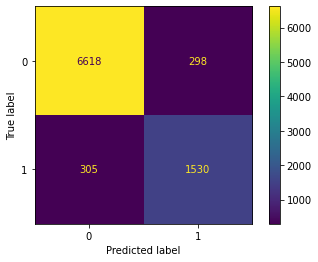

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

TF Keras Model
-----------

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.efficientnet import *

feature_count = X_train.shape[1]

model = keras.Sequential()
model.add(keras.layers.Dense(feature_count, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(feature_count*5, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(feature_count*5, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(feature_count, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))



def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy', f1_metric])



checkpoint_path = 'models/Mymodel.h5'

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=10, min_lr=0.00001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]



model.fit(X_train,
          y_train,
          validation_data =(X_test, y_test),
          epochs = 80,
          callbacks=callbacks)

Epoch 1/80
378/394 [===========================>..] - ETA: 0s - loss: 0.3198 - accuracy: 0.8511 - f1_metric: 0.7082
Epoch 00001: val_loss improved from inf to 0.21917, saving model to models/Mymodel.h5
394/394 [==============================] - 3s 4ms/step - loss: 0.3104 - accuracy: 0.8564 - f1_metric: 0.7192 - val_loss: 0.2192 - val_accuracy: 0.9535 - val_f1_metric: 0.1968 - lr: 0.0010
Epoch 2/80
387/394 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9872 - f1_metric: 0.9848
Epoch 00002: val_loss improved from 0.21917 to 0.15930, saving model to models/Mymodel.h5
394/394 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9871 - f1_metric: 0.9847 - val_loss: 0.1593 - val_accuracy: 0.9507 - val_f1_metric: 0.2172 - lr: 0.0010
Epoch 3/80
384/394 [============================>.] - ETA: 0s - loss: 0.0496 - accuracy: 0.9910 - f1_metric: 0.9888
Epoch 00003: val_loss improved from 0.15930 to 0.15838, saving model to models/Mymodel.h5
394/394 [=

In [ ]:
# model finished test 

loaded_model = keras.models.load_model('models/Mymodel.h5', custom_objects={'f1_metric': f1_metric})

predictions = loaded_model.predict(X_test).round()
# predictions = np.where(predictions > 0.5, 1,0)
result_rmse = mean_squared_error(y_test, predictions, squared=False)
result_r2 = r2_score(y_test, predictions)
result_f1 = f1_score(y_test, predictions)
result_accuracy = accuracy_score(y_test, predictions)

accuracy = {'RMSE': result_rmse, 'r2': result_r2, 'f1': result_f1, 'accuracy' : result_accuracy}

accuracy

{'RMSE': 0.11109206403612569,
 'accuracy': 0.9876585533081933,
 'f1': 0.9707792207792209,
 'r2': 0.9255284511845533}

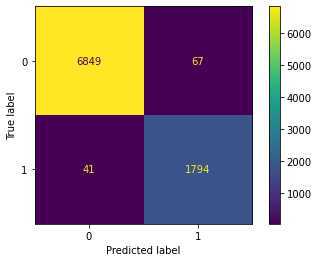

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Holdout Test
---------------


In [ ]:
holdout =  pd.read_csv('https://raw.githubusercontent.com/AHFXAdam/ahfxadam.github.io/master/450-resources/datasets/datasets/office_occupancy/datatest_holdout.csv')
holdout = holdout.iloc[:,1:]

holdout

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2/2/2015 14:19,23.700000,26.272000,585.200000,749.200000,0.004764
1,2/2/2015 14:19,23.718000,26.290000,578.400000,760.400000,0.004773
2,2/2/2015 14:21,23.730000,26.230000,572.666667,769.666667,0.004765
3,2/2/2015 14:22,23.722500,26.125000,493.750000,774.750000,0.004744
4,2/2/2015 14:23,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...
2660,2/4/2015 10:38,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,2/4/2015 10:40,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,2/4/2015 10:40,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,2/4/2015 10:41,24.356667,25.700000,813.000000,1123.000000,0.004849


In [ ]:

holdout, holdout_raw = data_process(holdout)

for x in data.columns :
  if not x in holdout.columns :
    holdout[x] = 0

holdout = holdout.drop(columns=['date', 'Occupancy'])

In [ ]:
from google.colab import files
# model finished test 

loaded_model = keras.models.load_model('models/Mymodel.h5', custom_objects={'f1_metric': f1_metric})


holdout = scaler.transform(holdout).astype(np.float32)

holdout_predictions = loaded_model.predict(holdout).round()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
np.unique(holdout_predictions)

array([0., 1.], dtype=float32)

In [ ]:
holdout_predictions = pd.DataFrame(holdout_predictions)

holdout_predictions.to_csv('occupancy_holdout_predictions.csv')
files.download("occupancy_holdout_predictions.csv")